# Upload df

In [24]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronReading_38.csv')


In [25]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [26]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [27]:
#drop ID and continuous label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_score'])

In [28]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronReading'].drop(columns=['dataSource'])


In [31]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print DataFrame info to see all columns and their data types
print(one_hot_encoded_df2.info())

print(one_hot_encoded_df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Columns: 139 entries, level to past_proficient_score
dtypes: bool(134), float64(1), int64(4)
memory usage: 3.4 MB
None
level                        0
is_proficient                0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5280
Length: 139, dtype: int64


In [32]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [33]:
one_hot_encoded_df2.shape

(20460, 139)

In [34]:
one_hot_encoded_df2['past_proficient_score']

0        0.969279
1        1.009665
2        0.934354
3        1.028650
4        0.949085
           ...   
20455         NaN
20456         NaN
20457         NaN
20458         NaN
20459    0.870724
Name: past_proficient_score, Length: 20460, dtype: float64

In [35]:
#dropped null values
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [36]:
one_hot_encoded_df2.shape

(15180, 139)

## PCA

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['is_proficient']))

In [38]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8010141117731087


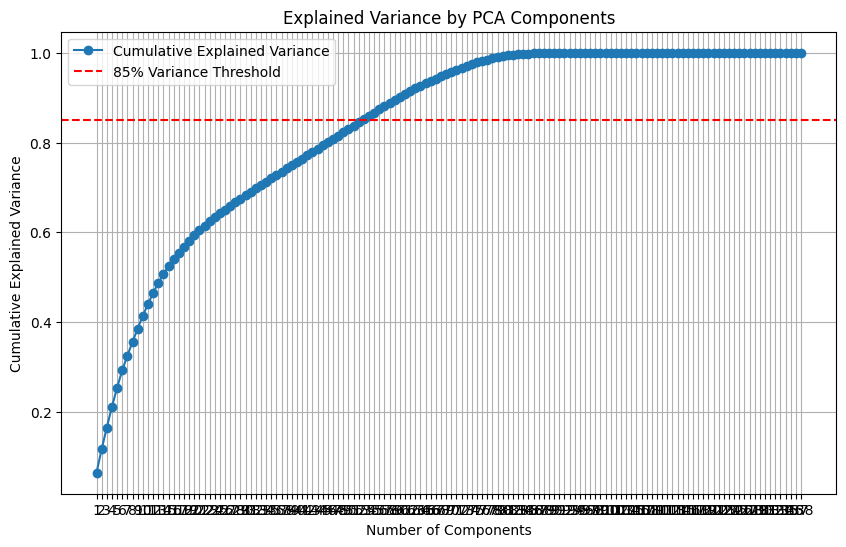

Number of components needed: 46


In [39]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [40]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [41]:
first_46_pcs_df = X_pca_df.iloc[:, :46].copy()

In [42]:
first_46_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
0,-4.413662,-3.371036,0.631070,0.189679,17.975992,12.240829,-12.251438,0.684298,4.023727,12.495395,1.530216,2.314058,-4.669215,-12.380585,7.604633,-2.500150,-1.044729,0.260789,0.389427,-1.781099,-2.366148,-0.462402,0.085027,-0.518713,-2.444218,1.981118,-4.002206,0.159393,1.426280,-0.640398,0.956218,1.389018,-2.440111,-0.683176,-0.169545,0.464145,0.618300,0.016341,0.107877,-0.015779,-0.006187,1.774022e-02,0.004527,-0.008379,0.048573,-0.034576
1,-3.149145,-3.272884,0.493852,0.153124,12.413644,7.174544,-6.326654,0.155909,2.072803,5.806828,0.765727,1.341605,-3.373457,-4.451882,2.107381,-0.435064,-0.362350,0.080913,-0.184790,-0.575180,0.677503,-0.019811,-0.028482,0.141986,1.213324,0.714550,0.354637,-0.005021,-0.272563,0.353965,-0.436290,-0.036926,0.464585,-0.206879,0.124157,0.044226,0.045879,-0.002413,-0.019079,0.008925,0.001864,-4.616361e-03,-0.009424,-0.000557,-0.015393,0.004574
2,-3.149739,-3.896399,0.576627,-0.081387,16.111867,-9.606662,-4.651917,-0.183306,-3.684891,4.199903,-0.183293,1.415111,1.444999,13.962593,0.886138,0.979386,-2.590553,0.549593,2.964856,3.115593,-0.652651,0.662122,0.015161,0.072314,1.085675,0.923607,0.852288,2.593599,1.455804,2.053386,-0.874527,-0.713052,0.847844,2.188937,-0.632577,-0.638419,0.153013,0.052960,0.011147,-0.032782,0.015367,6.206443e-03,0.013735,0.026058,-0.005961,-0.011558
3,-3.287624,-3.439358,0.562677,0.159315,14.039770,7.390462,-8.527047,0.431338,2.486966,8.560338,0.988685,2.034590,-4.473241,-7.768237,6.270327,-2.028471,-1.453719,0.061561,-0.435547,-3.445009,-0.012388,-0.510424,-0.057262,0.017607,0.255652,-0.756897,0.865080,-1.193274,-0.875297,-1.042417,0.443575,-0.167202,-0.087882,-0.369118,0.140862,0.032152,-0.306188,-0.021860,-0.013478,0.006425,-0.006000,-2.061511e-03,0.004853,-0.005676,0.005791,0.009531
4,-3.735432,-3.922806,0.643175,0.213069,16.225312,12.200815,-10.831599,0.429609,4.061841,11.053388,1.374951,2.705626,-6.674062,-12.526965,7.626707,-2.398763,-2.552976,0.380585,0.691655,-2.974341,-1.382288,-0.569856,-0.051839,0.038504,0.664044,-0.348539,1.281739,-0.160697,-1.215563,-0.406038,-0.060742,-0.372366,0.369625,-0.245198,0.139672,0.020126,-0.103310,-0.007307,-0.013368,0.005865,-0.003145,-4.035238e-03,0.004022,-0.000149,-0.004858,0.005459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15175,-0.573582,-0.788533,-0.004429,0.060111,-0.961750,-0.086735,-0.373584,-0.017900,-0.012113,0.116184,-0.012893,0.022657,0.029838,0.010161,0.080555,0.008042,-0.070920,-0.412775,-0.043012,0.002593,-0.031299,0.055511,0.001047,0.018014,-0.083797,0.024067,-0.037848,0.115276,-0.087954,0.030918,0.013190,-0.006479,0.003979,0.057558,-0.022941,-0.028225,-0.011937,-0.003169,-0.001093,0.002136,0.001096,2.242006e-04,-0.003845,0.001674,0.000458,0.003284
15176,-0.555705,-0.789482,-0.006309,0.079637,-0.933664,-0.060894,-0.346359,0.074178,-0.015667,0.111904,-0.003149,-0.000232,0.033068,0.006971,0.126556,0.055019,-0.201107,-0.543920,0.031556,0.004995,0.086474,0.174334,-0.005654,-0.117915,0.206828,-0.111591,0.140988,-0.268856,0.536710,0.088671,-0.089230,-0.016266,0.063490,0.026086,0.010359,0.028111,0.105721,-0.000407,-0.002549,0.008736,0.002484,-1.543075e-03,-0.012579,0.000737,-0.009732,0.001126
15177,-0.068339,-0.894123,-0.001685,-0.055481,-0.969335,-0.224397,-0.426516,0.067099,-0.004085,0.180371,0.005411,-0.001186,0.031529,-0.002168,0.075756,0.040368,-0.129085,-0.528309,0.026420,0.037510,0.082212,0.067320,-0.000710,-0.037171,0.167005,-0.060666,0.091320,-0.217338,0.317113,0.010153,-0.052784,0.001042,0.014578,-0.041348,0.024565,0.039850,0.055984,0.004926,0.001291,-0.000834,-0.000373,-6.509914e-04,0.001077,-0.001549,-0.003555,-0.004200
15178,-0.074923,-0.893773

In [43]:

# Get the PCA components (loadings)
components = pca.components_[:46]  

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['is_proficient']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HOMEROOM', 'course_MATH 3', 'course_LANGUAGE 3', 'course_SOC ST 3', 'course_SCIENCE 3']
Top features for PC2: ['course_CivicsGr 7', 'course_Geog Gr7', 'course_English Gr 7', 'course_Math 7', 'course_LifeSci Gr7']
Top features for PC3: ['course_English Gr 8', 'course_PhySci Gr 8', 'course_WLDHIS 1500', 'course_CareerPrepA5', 'course_Math8 PreAlg']
Top features for PC4: ['course_READING 4', 'course_SCIENCE 4', 'course_LANGUAGE 4', 'course_SOC ST 4', 'course_MATH 4']
Top features for PC5: ['course_EnrichmtP6', 'school_Middle School A', 'course_English LA 5', 'course_Science Gr 5', 'course_SocialStuGr5']
Top features for PC6: ['course_MATH 6', 'course_English LA 6', 'course_PE 6', 'course_Science Gr 6', 'course_English LA 5']
Top features for PC7: ['school_Middle School D', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A', 'course_Math6H/Adv', 'course_SciGr6H/A']
Top features for PC8: ['course_CivicH/Adv 7', 'course_GeogH/AdvGr7', 'course_LifeSciH Gr7', 'course_Eng 7

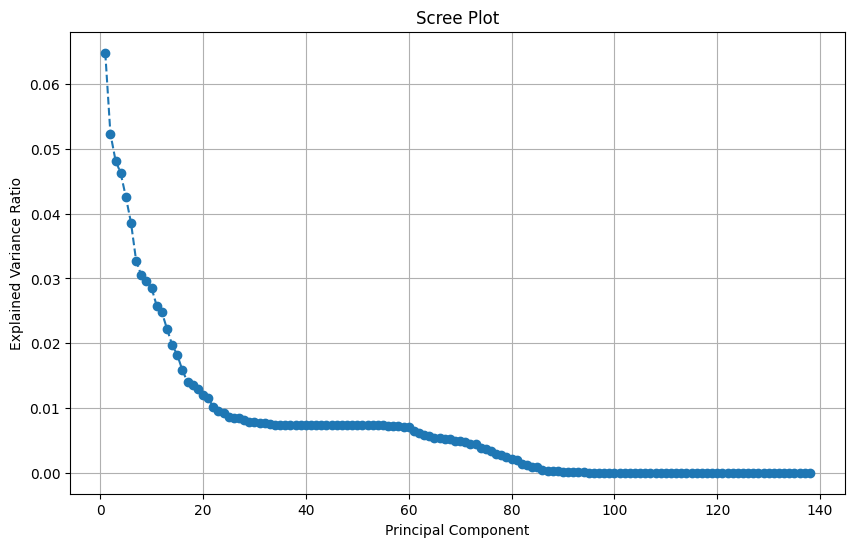

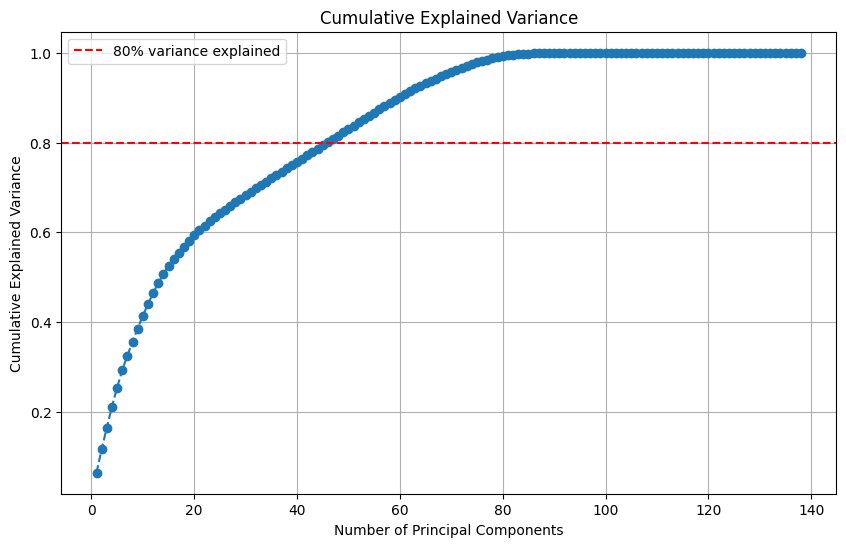

In [44]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

In [45]:
from sklearn.model_selection import train_test_split
import numpy as np


In [46]:
X = first_46_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['is_proficient']  # Labels


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Final binary xg boost / catboost model

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6168763	test: 0.6162752	best: 0.6162752 (0)	total: 150ms	remaining: 1m 14s
50:	learn: 0.2942827	test: 0.2985405	best: 0.2985405 (50)	total: 827ms	remaining: 7.28s
100:	learn: 0.2768248	test: 0.2875223	best: 0.2874324 (99)	total: 1.53s	remaining: 6.03s
150:	learn: 0.2663749	test: 0.2851031	best: 0.2850559 (146)	total: 2.12s	remaining: 4.9s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2850559002
bestIteration = 146

Shrink model to first 147 iterations.
CatBoost - Accuracy: 0.88, Macro F1-Score: 0.87
Confusion Matrix (CatBoost):
 [[1691  179]
 [ 198  968]]


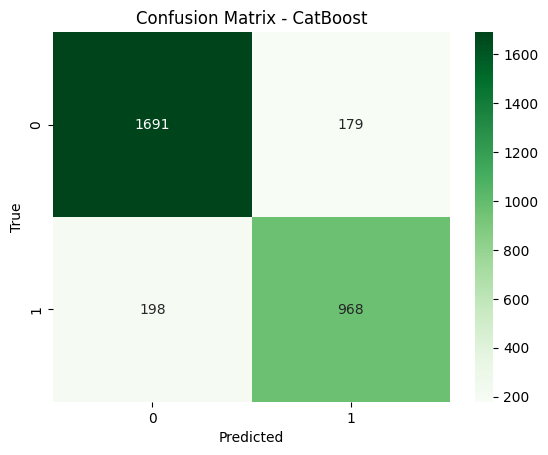

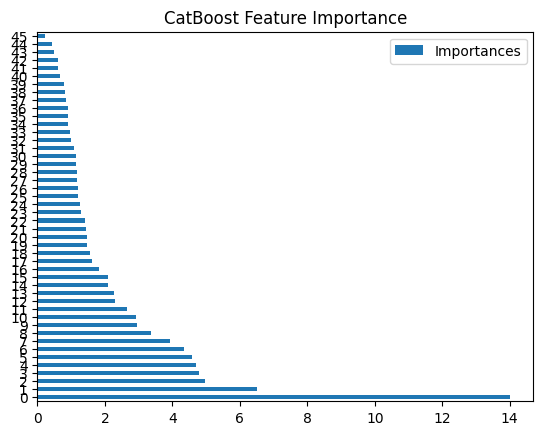

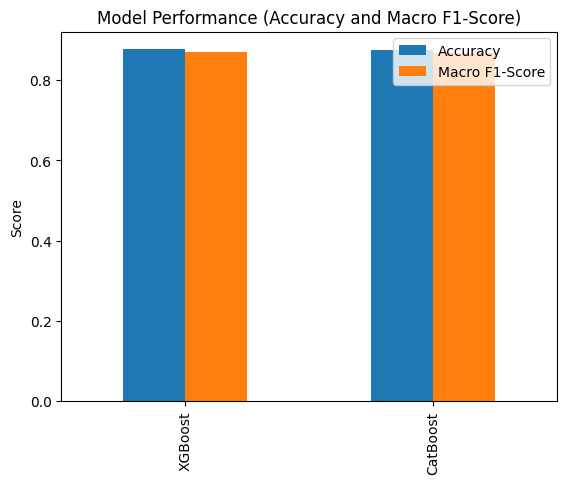

In [49]:

# --- CatBoost Code ---

# Identify categorical features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Prepare data pools for CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Initialize and train CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    eval_metric='Logloss',
    cat_features=categorical_features_indices
)

# Train with early stopping
catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Predictions and evaluation
catboost_y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
catboost_y_pred = (catboost_y_pred_proba > 0.5).astype(int)

# Compute metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_macro_f1 = f1_score(y_test, catboost_y_pred, average='macro')
catboost_conf_matrix = confusion_matrix(y_test, catboost_y_pred)

print(f"CatBoost - Accuracy: {catboost_accuracy:.2f}, Macro F1-Score: {catboost_macro_f1:.2f}")
print("Confusion Matrix (CatBoost):\n", catboost_conf_matrix)

# Plot confusion matrix
sns.heatmap(catboost_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance for CatBoost
feature_importance = pd.DataFrame(catboost_model.get_feature_importance(prettified=True))
feature_importance.plot(kind='barh', title='CatBoost Feature Importance')
plt.show()

# --- Model Comparison ---

# Compile and plot model metrics
metrics = {
    'Accuracy': [xgb_accuracy, catboost_accuracy],
    'Macro F1-Score': [xgb_macro_f1, catboost_macro_f1]
}
df_metrics = pd.DataFrame(metrics, index=['XGBoost', 'CatBoost'])

df_metrics.plot(kind='bar', title="Model Performance (Accuracy and Macro F1-Score)")
plt.ylabel("Score")
plt.show()

Cross-Validated Accuracy (XGBoost): 0.87
[0]	train-logloss:0.60994	eval-logloss:0.61044
[1]	train-logloss:0.56471	eval-logloss:0.56589
[2]	train-logloss:0.52672	eval-logloss:0.52880
[3]	train-logloss:0.49466	eval-logloss:0.49754
[4]	train-logloss:0.46738	eval-logloss:0.47098
[5]	train-logloss:0.44395	eval-logloss:0.44818
[6]	train-logloss:0.42388	eval-logloss:0.42868
[7]	train-logloss:0.40626	eval-logloss:0.41135
[8]	train-logloss:0.39081	eval-logloss:0.39653
[9]	train-logloss:0.37709	eval-logloss:0.38352
[10]	train-logloss:0.36519	eval-logloss:0.37235
[11]	train-logloss:0.35510	eval-logloss:0.36223
[12]	train-logloss:0.34542	eval-logloss:0.35306
[13]	train-logloss:0.33750	eval-logloss:0.34550
[14]	train-logloss:0.32968	eval-logloss:0.33797
[15]	train-logloss:0.32325	eval-logloss:0.33248
[16]	train-logloss:0.31723	eval-logloss:0.32741
[17]	train-logloss:0.31193	eval-logloss:0.32272
[18]	train-logloss:0.30721	eval-logloss:0.31864
[19]	train-logloss:0.30286	eval-logloss:0.31443
[20]	trai

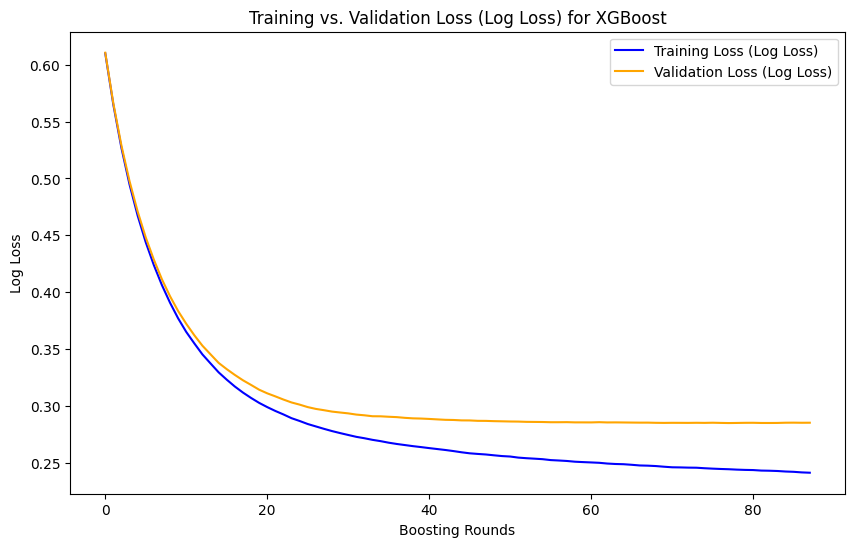

XGBoost - Accuracy: 0.88, Macro F1-Score: 0.87
Confusion Matrix (XGBoost):
 [[1692  178]
 [ 196  970]]


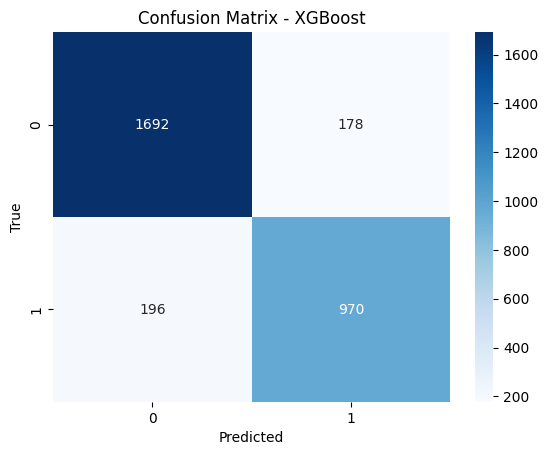

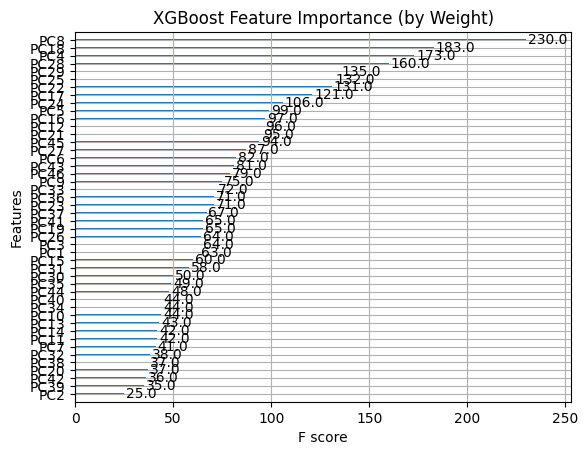

In [50]:
# Import required libraries
from xgboost import XGBClassifier, DMatrix, train, plot_importance
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- XGBoost Code ---

# Initialize XGBClassifier for binary classification
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation for accuracy estimation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy (XGBoost): {mean_cv_accuracy:.2f}")

# Prepare data in DMatrix format
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'binary:logistic',
    'random_state': 42,
    'eval_metric': 'logloss'
}

# Evaluate train and validation metrics during training
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Plot training vs validation loss
train_loss_xgb = evals_result['train']['logloss']
validation_loss_xgb = evals_result['eval']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (Log Loss)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (Log Loss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Loss (Log Loss) for XGBoost')
plt.legend()
plt.show()

# Predictions and evaluation
xgb_y_pred_proba = xgb_model_trained.predict(dtest)
xgb_y_pred = (xgb_y_pred_proba > 0.5).astype(int)

# Compute metrics
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"XGBoost - Accuracy: {xgb_accuracy:.2f}, Macro F1-Score: {xgb_macro_f1:.2f}")
print("Confusion Matrix (XGBoost):\n", xgb_conf_matrix)

# Plot confusion matrix
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance plot for XGBoost
plot_importance(xgb_model_trained, importance_type='weight', title='XGBoost Feature Importance (by Weight)')
plt.show()



## metric comparison

In [52]:
# Extract values from the confusion matrix
n1, n2 = xgb_conf_matrix[0]  # TN, FP
n3, n4 = xgb_conf_matrix[1]  # FN, TP

# Calculate metrics
precision = n4 / (n4 + n2) if (n4 + n2) != 0 else 0  # Avoid division by zero
tpr = n4 / (n4 + n3) if (n4 + n3) != 0 else 0        # Sensitivity (Recall)
tnr = n1 / (n1 + n2) if (n1 + n2) != 0 else 0        # Specificity

print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR/Specificity): {tnr:.4f}")

Precision: 0.8449
True Positive Rate (TPR/Sensitivity): 0.8319
True Negative Rate (TNR/Specificity): 0.9048


In [54]:
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Macro F1 Score: {xgb_macro_f1:.2f}")

Accuracy: 0.88
Macro F1 Score: 0.87


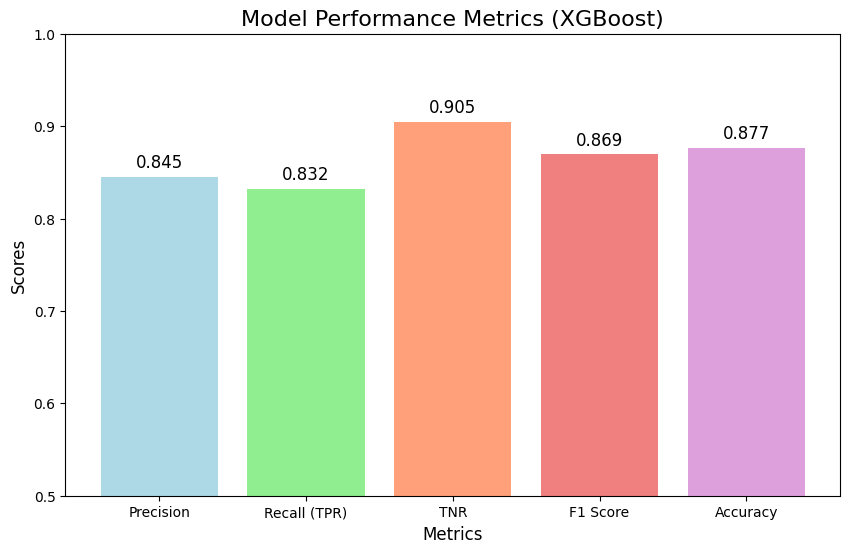

In [56]:


# Metrics and their corresponding values
metrics = ['Precision', 'Recall (TPR)', 'TNR', 'F1 Score', 'Accuracy']
values = [precision, tpr, tnr, xgb_macro_f1, xgb_accuracy]

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral', 'plum']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Model Performance Metrics (XGBoost)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Setting y-axis limits from 0.5 to 1
plt.ylim(0.5, 1)

# Display the values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.3f}', ha='center', fontsize=12)

plt.show()
